In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

In [66]:
d = pd.read_csv('/home/avic/om2/datasets/plane/full/merged_dataset.csv')

In [67]:
def get_heatmap_cell_ranges(num_cubelets):
    assert num_cubelets % 2 == 0
    assert num_cubelets % 2 == 0
    
    longtitude = num_cubelets + 1
    latitude = num_cubelets // 2
    r = 1

    dim0, delta_theta = np.linspace(-np.pi, np.pi, longtitude, retstep=True)
    delta_S = delta_theta / latitude

    dim1 = 1-np.arange(2*latitude+1) * delta_S / (r**2 * delta_theta)
    dim1 =  np.arccos(dim1)
    dim1 = (dim1 - (np.pi / 2))

    dim2 = np.linspace(-np.pi, np.pi, num_cubelets + 1)

    
    return dim0, dim1, dim2

In [84]:
def process_img(img_path):
    img = Image.open(img_path)
    img = img.crop((55, 55, 224 - 55, 224 - 55))
    img = img.resize((30, 30,), resample=Image.LANCZOS)
    img = np.array(img)
    background = img < 90
    img[background] = 0
    return img

In [70]:
dim0s, dim1s, dim2s = get_heatmap_cell_ranges(30)

In [71]:
d['object_x_cat'] = pd.cut(d.object_x, dim0s).cat.codes
d['object_y_cat'] = pd.cut(d.object_y, dim1s).cat.codes
d['object_z_cat'] = pd.cut(d.object_z, dim2s).cat.codes

In [72]:
groups = d.groupby([d.object_x_cat, d.object_y_cat, d.object_z_cat])

In [85]:
imgs = np.zeros((30, 30, 30, 30, 30))
for name, group in tqdm(groups):
    imgs[name[0], name[1], name[2]] = process_img(group.iloc[0].image_name)

100%|██████████| 26996/26996 [01:55<00:00, 234.12it/s]


In [86]:
imgs_as_int = imgs.astype(np.uint8)

In [91]:
f.close()

In [108]:
with gzip.GzipFile("/home/avic/OOD_Orientation_Generalization/demo/plane_imgs4.npy.gz", "w") as f:
    np.save(file=f, arr=imgs_as_int)

In [94]:
import scipy.sparse

In [107]:
scipy.sparse.save_npz("/home/avic/OOD_Orientation_Generalization/demo/plane_imgs3.npz", scipy.sparse.coo_matrix(imgs_as_int.reshape(30 ** 4, 30)))

In [106]:
scipy.sparse.bsr_matrix(imgs_as_int.reshape(30 ** 4, 30))

<810000x30 sparse matrix of type '<class 'numpy.uint8'>'
	with 4810456 stored elements (blocksize = 2x2) in Block Sparse Row format>

In [87]:
np.save('/home/avic/OOD_Orientation_Generalization/demo/plane_imgs2.npy', imgs_as_int)

In [111]:
with gzip.GzipFile("/home/avic/OOD_Orientation_Generalization/demo/plane_imgs4.npy.gz", "r") as f:
    planes = np.load(f)

In [2]:
# planes = np.load('/home/avic/OOD_Orientation_Generalization/demo/plane_imgs.npy')

In [113]:
indxs = np.round(np.linspace(0, 29, 20), 0).astype(int)

In [118]:
planes_subset = planes[indxs][:, indxs][:, :, indxs]

In [119]:
planes_reshape = np.transpose(planes_subset, (2,0,3,1,4)).reshape(20, 20 * 30, 20 * 30)

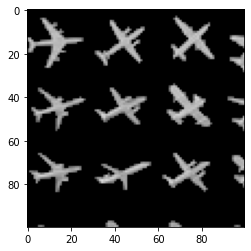

In [120]:
plt.imshow(planes_wo_background[0][:100, :100], cmap='gray', vmin=0, vmax=255)

In [ ]:
np.linspace(